<a href="https://colab.research.google.com/github/suryanshujain/MainTask/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def sigmoid(x):
  g=1/(1+np.exp(x))
  return g

In [ ]:
path='/content/drive/MyDrive/Dataset/Logistic_train_data.csv'
train=pd.read_csv(path)
train=train.to_numpy()
path1='/content/drive/MyDrive/Dataset/Logistic_test_data.csv'
test=pd.read_csv(path1)
test=test.to_numpy()

In [ ]:
y_train=train[:,2]
x_train=train[:,3:]
y_test=test[:,2]
x_test=test[:,3:]
n=x_train.shape[1]
for i in range(n):
  k=x_train[:,i].max()
  x_train[:,i]= x_train[:,i]/k
  x_test[:,i]= x_test[:,i]/k

In [ ]:
def cost(x, y, w, b,llambda = 1):
    m,n  = x.shape
    cost = 0.0
    for i in range(m):
      z = np.dot(x[i], w) + b
      y_pred = sigmoid(z)
      cost +=  -y[i]*np.log(y_pred) - (1-y[i])*np.log(1-y_pred)
    cost/=(2 * m)
    reg_cost = 0
    for j in range(n):
      reg_cost += (w[j]**2)
    reg_cost = (llambda/(2*m)) * reg_cost
    total_cost = cost + reg_cost
    return total_cost

In [ ]:
def gradient(x, y, w, b, llambda=1):
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m):
        y_pred = sigmoid(np.dot(x[i],w) + b)
        err_i  = y_pred - y[i]
        for j in range(n):
            dj_dw[j]+= err_i * x[i,j]
        dj_db+=err_i
    dj_dw/=m
    dj_db/=m
    for j in range(n):
        dj_dw[j]+=(llambda/m) * w[j]
    return dj_dw, dj_db

In [ ]:
def descent(x,y,w,b,a,itr):
    cost_history=[]
    for i in range(itr):
      cost_=cost(x,y,w,b)
      dj_dw, dj_db = gradient(x, y, w, b)
      w = w + a * dj_dw
      b = b + a * dj_db
      print(cost_)
      cost_history.append(cost_)
    return w,b,cost_history

In [ ]:
m,n=x_train.shape
w_in=np.zeros((n,))
b_in=0.0
a=0.15
itr=1000
w,b,all_costs=descent(x_train,y_train,w_in,b_in,a,itr)

0.3465735902799716
0.33813913390297634
0.3312845614890467
0.3256502523315291
0.32095888761790325
0.31699803804489307
0.31360549916632857
0.3106575107399188
0.3080595578502749
0.3057393098751346
0.3036412542071531
0.30172263951876405
0.29995041575240905
0.29829892628187527
0.29674816524774295
0.2952824589128375
0.2938894652435323
0.29255941269150343
0.2912845191983221
0.29005854737305636
0.28887646288064706
0.2877341713114946
0.2866283149226395
0.2855561152000948
0.28451525059787364
0.2835037613619212
0.2825199752668961
0.2815624495426399
0.2806299253646284
0.2797212921168716
0.2788355592720018
0.27797183422015614
0.2771293047520458
0.27630722518934536
0.2755049053777437
0.2747217019299684
0.2739570112395656
0.27321026389003056
0.27248092016473197
0.27176846642629626
0.27107241218346995
0.2703922877022257
0.2697276420482126
0.269078041471538
0.2684430680636066
0.26782231863053035
0.2672154037392612
0.26662194690178564
0.2660415838699535
0.26547396201925755
0.26491873980438085
0.26437558

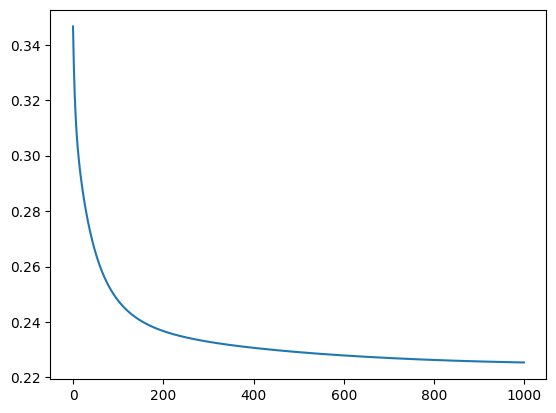

In [ ]:
rng=np.arange(0,itr)
plt.plot(rng,all_costs)
plt.show()

In [ ]:
print(w,b)

[ 2.49913185  0.30924411 -0.31047003 -1.26081438 -0.57055234  0.66451513
  0.55464441  0.42879919 -0.13465143 -1.43143281 -0.02956654 -0.66414031
 -0.32131049 -0.15359586] -1.0259125778154876


In [ ]:
print(cost(x_test,y_test,w,b))

In [ ]:
m,n=x_test.shape
count=0
for i in range(m):
  z=np.dot(x_test[i],w)+b
  y_pred=sigmoid(z)
  if(y_pred<0.5):
    y_pred=0
  else:
    y_pred=1
  if (y_pred==y_test[i]):
    count=count+1
print("Accuracy= " ,count*100/m,"%")

Accuracy=  81.0 %
